## Modification to plot a square in the complex plane with center in (z_c_r, z_c_i) and of size zw x zh 

Modfied from Fractals with Python - The Newton Set https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/
from the Fractals with Python series https://blog.anvetsu.com/tags/fractal/

German Hernandez

![picture](https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png)

In [4]:
import math
import matplotlib.pyplot as plt
import numpy as np

##Declaring functions

In [29]:
def function1(x):
    return x ** 2

def d1(x):
    return 2 * x

def function2(x):
    return (x - 1) ** 2

def d2(x):
    return 2 * x - 2

def function3(x):
    return x ** 2 - 1

def d3(x):
    return 2 * x

def function4(x):
    return x ** 2 + 1

def d4(x):
    return 2 * x


In [41]:
def classicQuadratic(a, b, c):
  disc = ((b)**2 + ((-4) * a * c))**(1/2)
  num = -b + disc
  den = 2 * a
  return [(-b + disc)/den, (-b - disc)/den]  

In [53]:
def poShenLohQuadratic(a, b, c):
  if a != 1:
    b = b/a
    c = c/a
  u = (((b**2)/4) - c)**(1/2)

  return [(-b/2) + u, (-b/2) - u]

In [36]:
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1,  niter=256, f=function1, df=d1):
    """ Fractals using newton-raphson """

    # Pixels array
    pixels = np.arange(width*height*3, dtype=np.uint32).reshape(height, width, 3)

    h = 1e-7 # step size for numerical derivative
    eps = 1e-3 # max error allowed

    # Bounding roots
    r1 = 1
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 5
    m = 1 # Newton's method for roots of multiplicity >1 https://math.stackexchange.com/questions/93156/newtons-method-for-roots-of-multiplicity-1/93158

    for y in range(height):
            zy =   z_c_i+(((y-(height/2))/height)*zh*zoom)

            for x in range(width):
                zx = z_c_r+ (((x-(width/2))/width)*zw*zoom)

                # Mapping real -> complex plane
                z = complex(zx, zy)
                
                count = 0
                
                for i in range(niter):
                    # complex numerical derivative
                    dz = df(z)
                    if dz == 0:
                        break

                    count += 1
                    if count > 255:
                        break
                   
                    znext = z - m*f(z) / dz # Newton iteration

                    if abs(znext - z) < eps: # stop when close enough to any root
                        break
                    
                    z = znext

                # Pixels colored using the roots
                if abs(z-r1)<eps:
                    # color red
                    pixels[height-y-1,x] = (255 - count*multcol, 0, 0)
                elif abs(z-r2)<=eps:
                    # color green
                    pixels[height-y-1,x] = (0, 255 - count*multcol, 0)
                else:   
                   pixels[height-y-1,x] = (0, 0, 0)
               
    return pixels

def display1(z_c_r=0, z_c_i=0, zh = 1, zw=1, width=500, height=500, zoom=1,  niter=256, f=function1, df=d1, title='none'):
    """ Display a newton-raphson fractal """
    print("Z region from (",z_c_r+ (((0-(width/2))/width)*zw*zoom),",",z_c_i+(((0-(height/2))/height)*zh*zoom) ,") to (",z_c_r+ (((width-(width/2))/width)*zw*zoom),",",z_c_i+(((height-(height/2))/height)*zh*zoom),")")
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh = zh, zw=zw, width=width, height=width, zoom=zoom,  niter=niter, f=f, df=df)
    title = 'Newton Fractal ' + title
    plt.title(title)
    plt.xlabel("real"+"("+ str(z_c_r+ (((0-(width/2))/width)*zw*zoom))+","+str(z_c_r+ (((width-(width/2))/width)*zw*zoom))+")")
    plt.ylabel("imaginary"+"("+str(z_c_i+(((0-(height/2))/height)*zh*zoom))+","+str(z_c_i+(((height-(height/2))/height)*zh*zoom)) +")")
    plt.imshow(pimg)
    plt.show()


#Function $X^{2}$

Text(0, 0.5, 'f(x)')

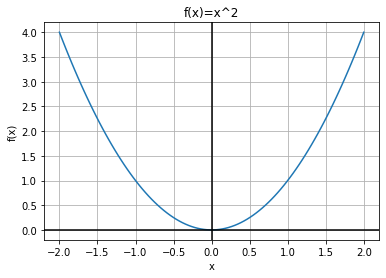

In [7]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,function1(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2')
plt.xlabel('x')
plt.ylabel('f(x)')

###Clasic quadratic method for $x^{2}$

In [46]:
roots = classicQuadratic(1, 0, 0)
print('x1 =', roots[0], ', x2 =', roots[1])

x1 = 0.0 , x2 = 0.0


###Po Shen Loh's quadratic method for $x^{2}$

In [54]:
roots = poShenLohQuadratic(1,0,0)
print('x1 =', roots[0], ', x2 =', roots[1])

x1 = 0.0 , x2 = 0.0


###Newton Fractals for $z^{2}$

zoom out
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


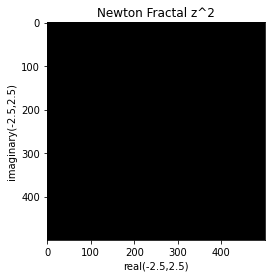

In [61]:
print("zoom out")
display1(zoom=5, f=function1, df=d1, title='z^2')

###Newton iterates form in axes for $z^{2}$

 #### $z=10.0 + 0.0j$

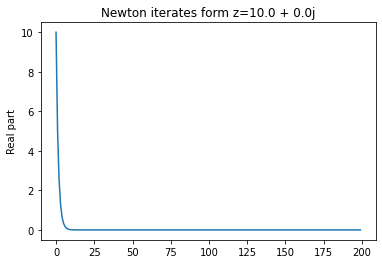

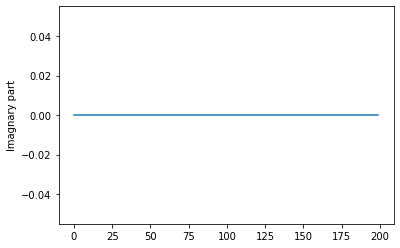

In [67]:
z=10.0 + 0.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d1(z)
  znext = z - function1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= -10.0 + 0.0j$

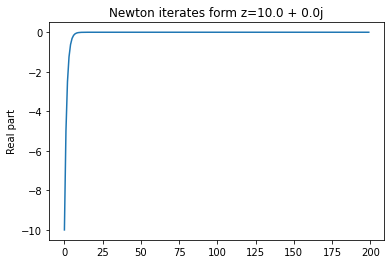

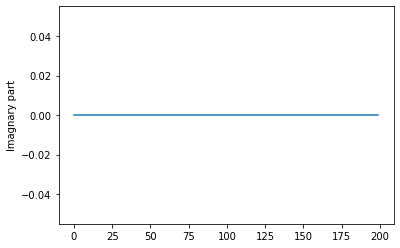

In [68]:
z=-10.0 + 0.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d1(z)
  znext = z - function1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= 0.0 + 10.0j$

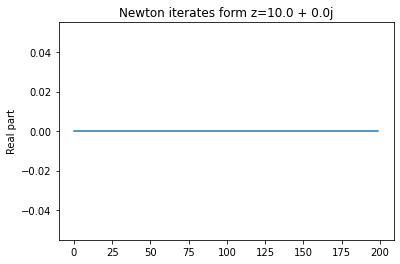

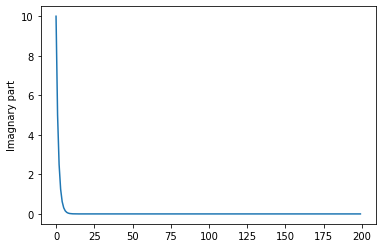

In [69]:
z=0.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d1(z)
  znext = z - function1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= 0.0 - 10.0j$

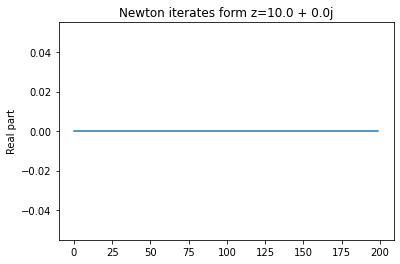

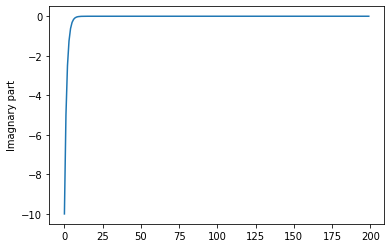

In [70]:
z=0.0 - 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d1(z)
  znext = z - function1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

###Newton iterates form in diagonals for $z^{2}$

 #### $z=0.0 + 0.0j$

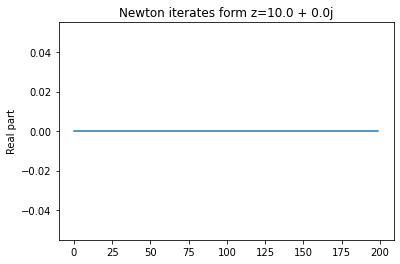

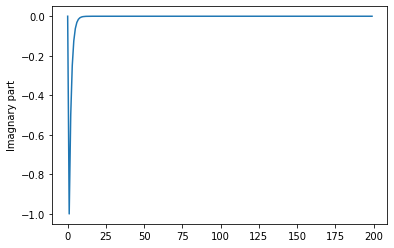

In [90]:
z=0.0 + 0.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d1(z)
  if dz != 0:
    znext = z - function1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z=10.0 + 10.0j$

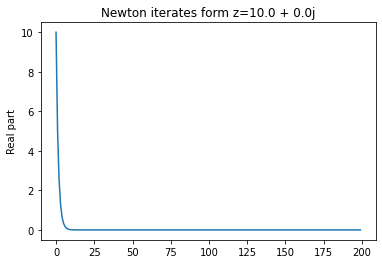

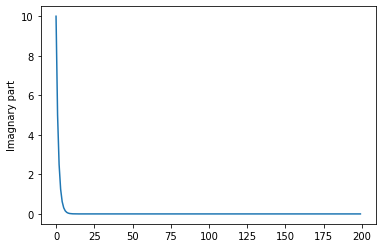

In [91]:
z=10.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d1(z)
  znext = z - function1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= -10.0 + 10.0j$

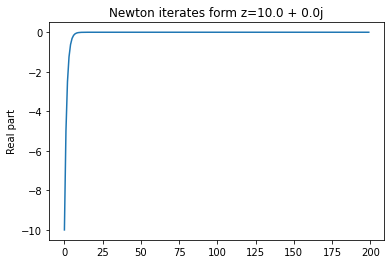

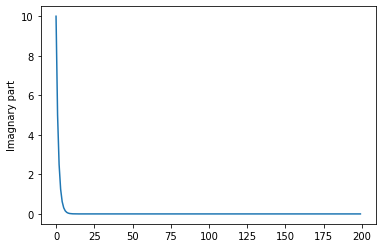

In [94]:
z=-10.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d1(z)
  znext = z - function1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= -10.0 - 10.0j$

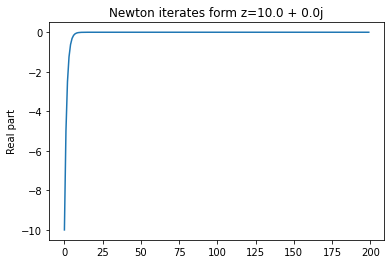

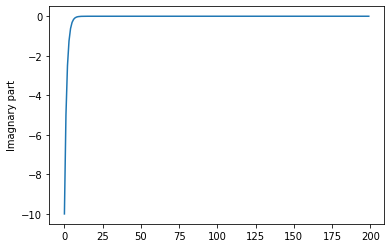

In [95]:
z=-10.0 - 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d1(z)
  znext = z - function1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= 10.0 - 10.0j$

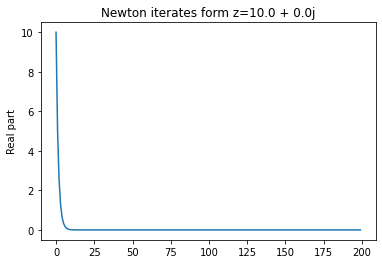

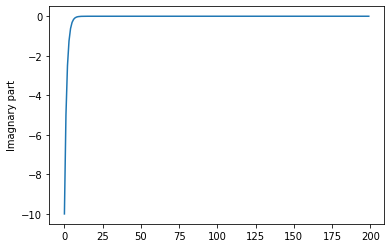

In [96]:
z=10.0 - 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d1(z)
  znext = z - function1(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

#Function $(X-1)^{2}$

Text(0, 0.5, 'f(x)')

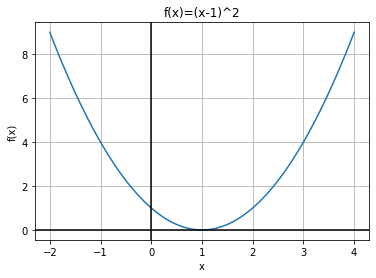

In [10]:
x = np.linspace(-2.0,4.0,100)
fig, ax = plt.subplots()
ax.plot(x,function2(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=(x-1)^2')
plt.xlabel('x')
plt.ylabel('f(x)')

###Clasic quadratic method for $(x-1)^{2}$

In [51]:
roots = classicQuadratic(1, -2, 1)
print('x1 =', roots[0], ', x2 =', roots[1])

x1 = 1.0 , x2 = 1.0


###Po Shen Loh's quadratic method for $(x-1)^{2}$

In [55]:
roots = poShenLohQuadratic(1, -2, 1)
print('x1 =', roots[0], ', x2 =', roots[1])

x1 = 1.0 , x2 = 1.0


###Newton Fractals for $(z-1)^{2}$

zoom out
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


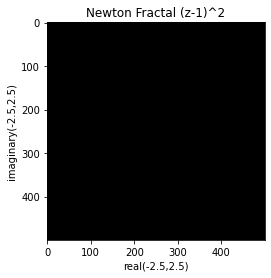

In [62]:
print("zoom out")
display1(zoom=5, f=function2, df=d2, title='(z-1)^2')

###Newton iterates form in axes for $(z-1)^{2}$

 #### $z=10.0 + 0.0j$

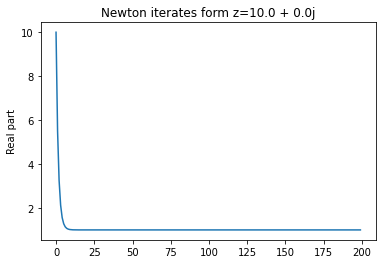

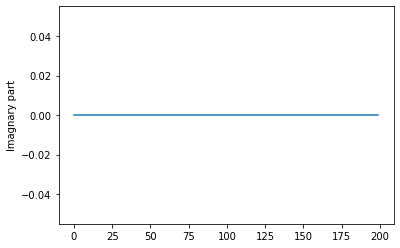

In [76]:
z=10.0 + 0.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d2(z)
  if dz != 0:
    znext = z - function2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= -10.0 + 0.0j$

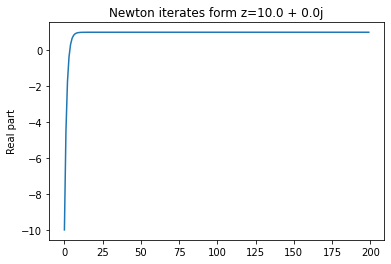

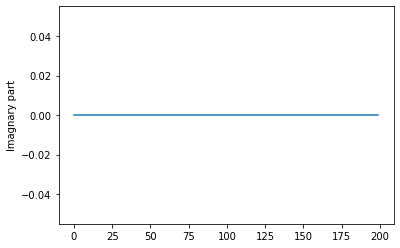

In [78]:
z=-10.0 + 0.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d2(z)
  if dz != 0:
    znext = z - function2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= 0.0 + 10.0j$

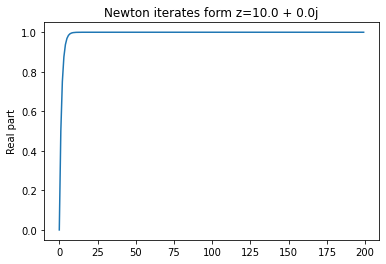

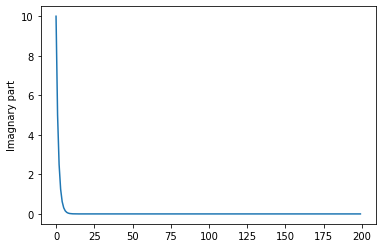

In [79]:
z=0.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d2(z)
  znext = z - function2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= 0.0 - 10.0j$

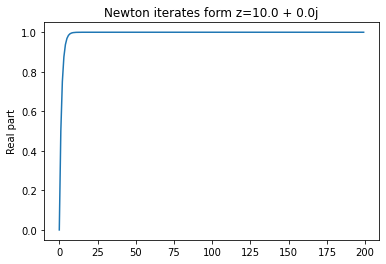

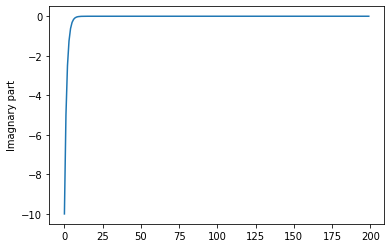

In [80]:
z=0.0 - 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d2(z)
  znext = z - function2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

###Newton iterates form in diagonals for $(z-1)^{2}$

 #### $z=0.0 + 0.0j$

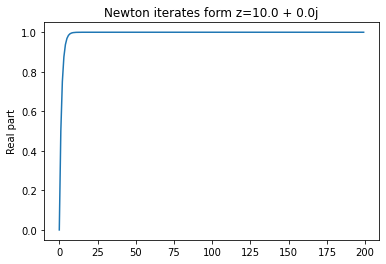

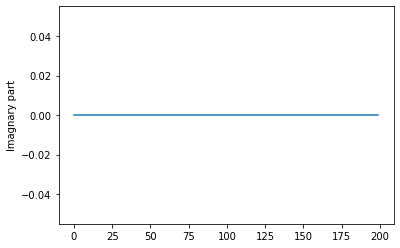

In [99]:
z=0.0 + 0.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d2(z)
  if dz != 0:
    znext = z - function2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z=10.0 + 10.0j$

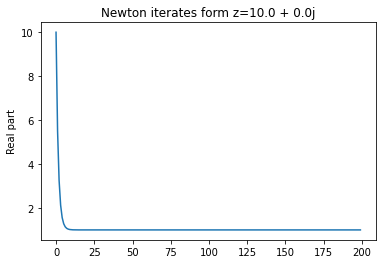

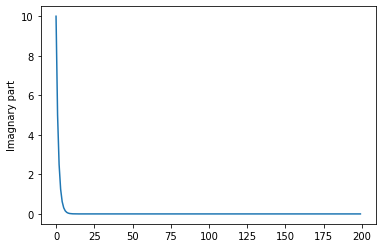

In [100]:
z=10.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d2(z)
  znext = z - function2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= -10.0 + 10.0j$

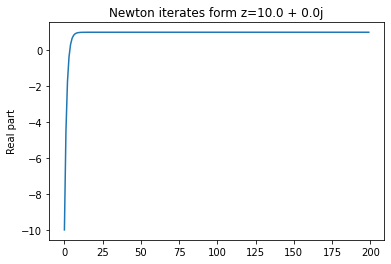

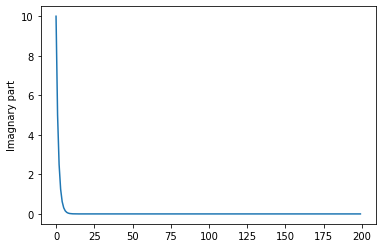

In [101]:
z=-10.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d2(z)
  znext = z - function2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= -10.0 - 10.0j$

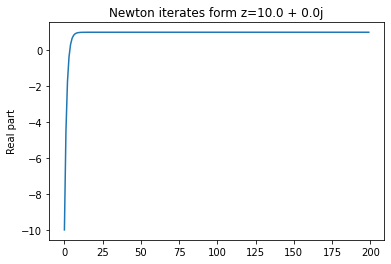

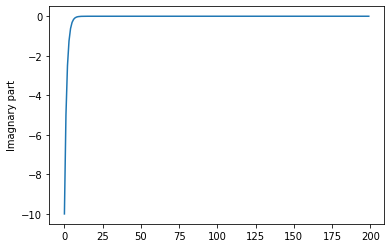

In [102]:
z=-10.0 - 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d2(z)
  znext = z - function2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= 10.0 - 10.0j$

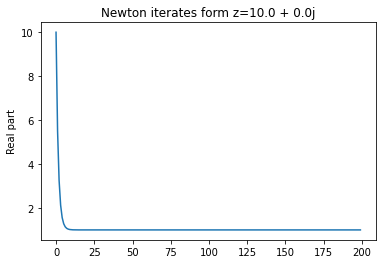

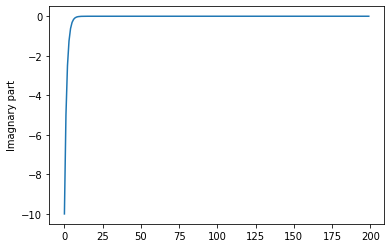

In [103]:
z=10.0 - 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d2(z)
  znext = z - function2(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

#Function $X^{2}-1$

Text(0, 0.5, 'f(x)')

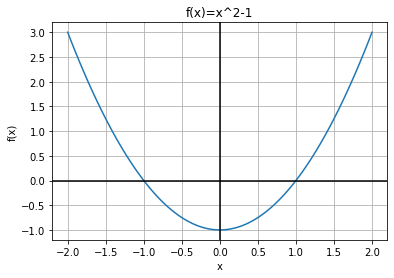

In [ ]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,function3(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2-1')
plt.xlabel('x')
plt.ylabel('f(x)')


###Clasic quadratic method for $x^{2} -1$

In [56]:
roots = classicQuadratic(1, 0, -1)
print('x1 =', roots[0], ', x2 =', roots[1])

x1 = 1.0 , x2 = -1.0


###Po Shen Loh's quadratic method for $x^{2} -1$

In [57]:
roots = poShenLohQuadratic(1, 0, -1)
print('x1 =', roots[0], ', x2 =', roots[1])

x1 = 1.0 , x2 = -1.0


###Newton Fractals for $z^{2} - 1$

zoom out
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


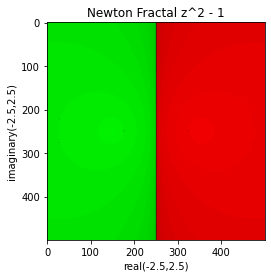

In [63]:
print("zoom out")
display1(zoom=5, f=function3, df=d3, title='z^2 - 1')

###Newton iterates form in axes for $z^{2} - 1$

 #### $z=10.0 + 0.0j$

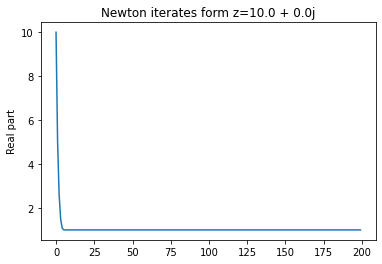

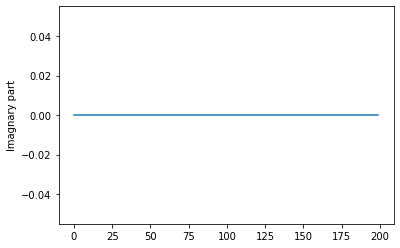

In [81]:
z=10.0 + 0.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d3(z)
  znext = z - function3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= -10.0 + 0.0j$

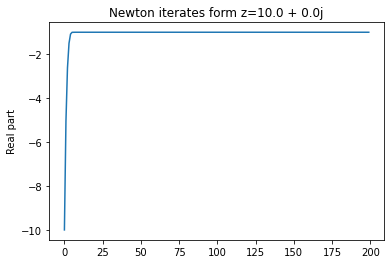

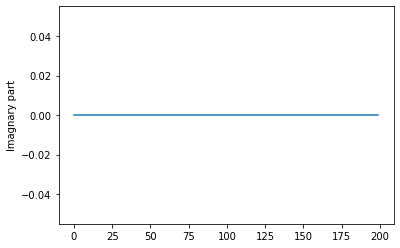

In [82]:
z=-10.0 + 0.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d3(z)
  znext = z - function3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= 0.0 + 10.0j$

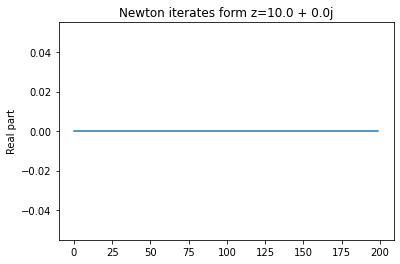

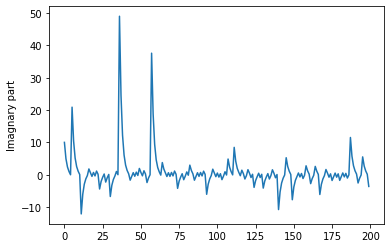

In [83]:
z=0.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d3(z)
  znext = z - function3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= 0.0 - 10.0j$

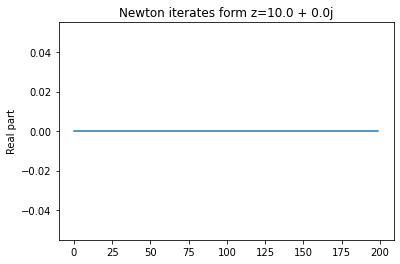

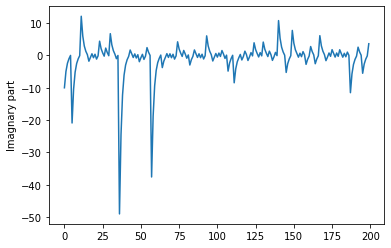

In [84]:
z=0.0 - 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d3(z)
  znext = z - function3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

###Newton iterates form in diagonals for $z^{2} - 1$

 #### $z=0.0 + 0.0j$

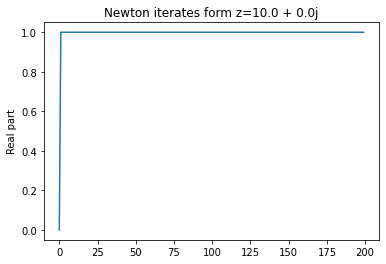

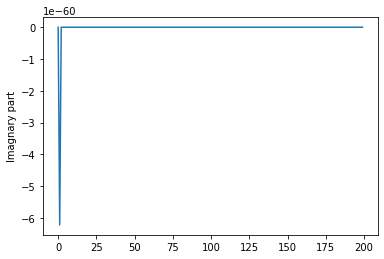

In [105]:
z=0.0 + 0.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d3(z)
  if dz != 0:
    znext = z - function3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z=10.0 + 10.0j$

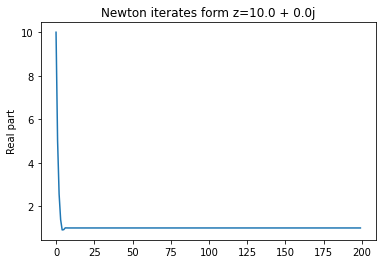

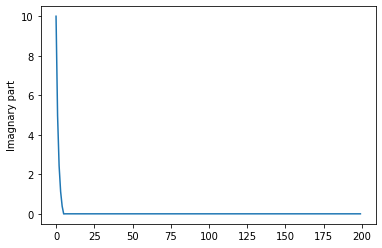

In [106]:
z=10.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d3(z)
  znext = z - function3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= -10.0 + 10.0j$

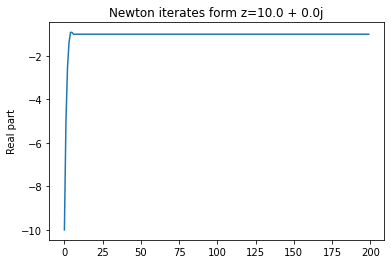

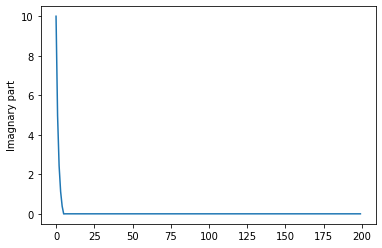

In [107]:
z=-10.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d3(z)
  znext = z - function3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= -10.0 - 10.0j$

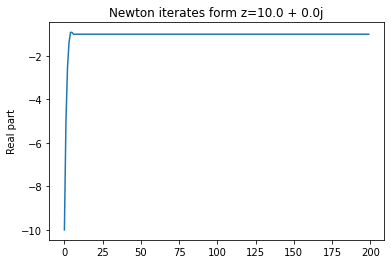

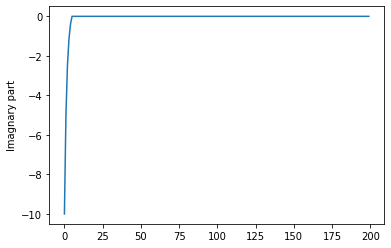

In [108]:
z=-10.0 - 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d3(z)
  znext = z - function3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= 10.0 - 10.0j$

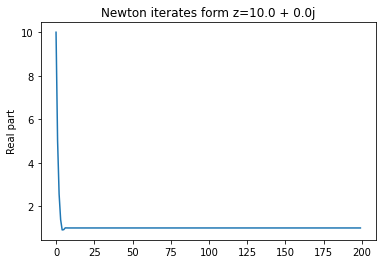

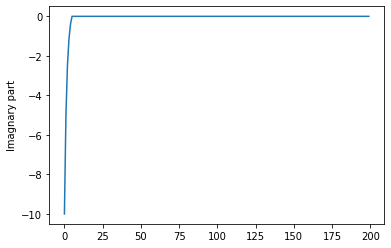

In [109]:
z=10.0 - 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d3(z)
  znext = z - function3(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

#Function $X^{2}+1$

Text(0, 0.5, 'f(x)')

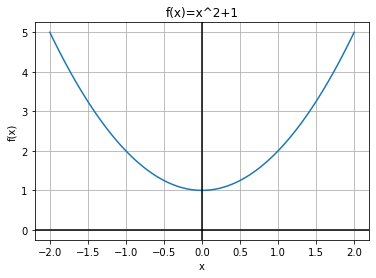

In [12]:
x = np.linspace(-2.0,2.0,100)
fig, ax = plt.subplots()
ax.plot(x,function4(x))
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
ax.grid(True, which='both')
plt.title('f(x)=x^2+1')
plt.xlabel('x')
plt.ylabel('f(x)')




###Clasic quadratic method for $x^{2} + 1$

In [58]:
roots = classicQuadratic(1, 0, 1)
print('x1 =', roots[0], ', x2 =', roots[1])

x1 = (6.123233995736766e-17+1j) , x2 = (-6.123233995736766e-17-1j)


###Po Shen Loh's quadratic method for $x^{2} + 1$

In [59]:
roots = poShenLohQuadratic(1, 0, 1)
print('x1 =', roots[0], ', x2 =', roots[1])

x1 = (6.123233995736766e-17+1j) , x2 = (-6.123233995736766e-17-1j)


###Newton Fractals for $z^{2} + 1$

zoom out
Z region from ( -2.5 , -2.5 ) to ( 2.5 , 2.5 )


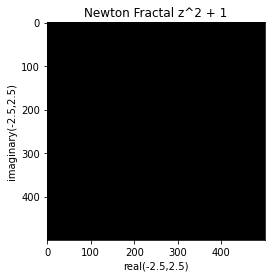

In [64]:
print("zoom out")
display1(zoom=5, f=function4, df=d4, title='z^2 + 1')

###Newton iterates form in axes for $z^{2} + 1$

 #### $z=10.0 + 0.0j$

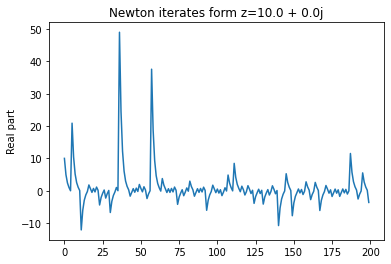

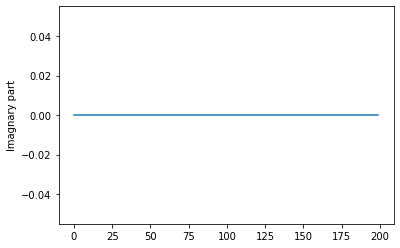

In [85]:
z=10.0 + 0.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d4(z)
  znext = z - function4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= -10.0 + 0.0j$

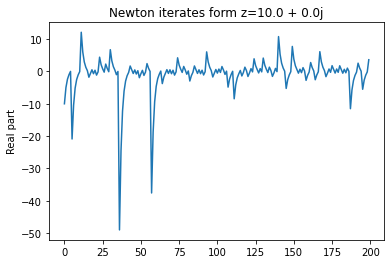

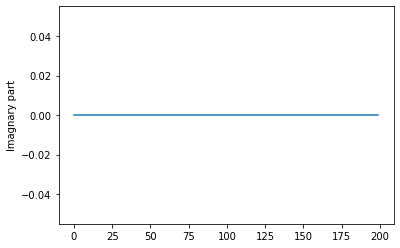

In [86]:
z=-10.0 + 0.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d4(z)
  znext = z - function4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= 0.0 + 10.0j$

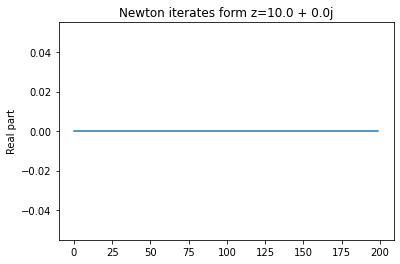

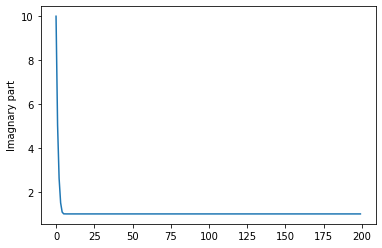

In [87]:
z=0.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d4(z)
  znext = z - function4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= 0.0 - 10.0j$

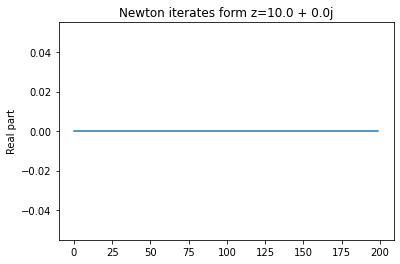

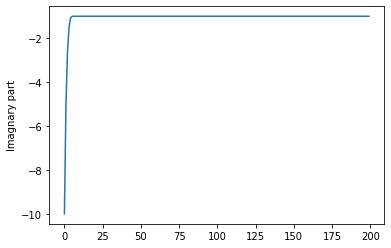

In [88]:
z=0.0 - 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d4(z)
  znext = z - function4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

###Newton iterates form in diagonals for $z^{2} + 1$

 #### $z=0.0 + 0.0j$

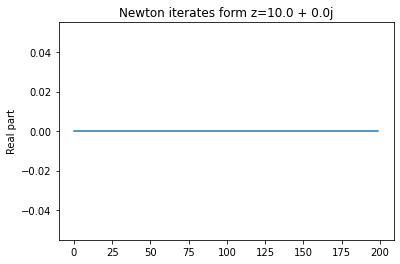

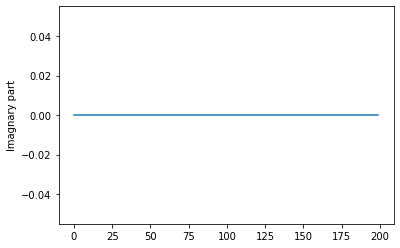

In [112]:
z=0.0 + 0.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d4(z)
  if dz != 0:
    znext = z - function4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z=10.0 + 10.0j$

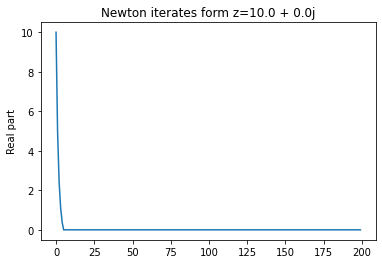

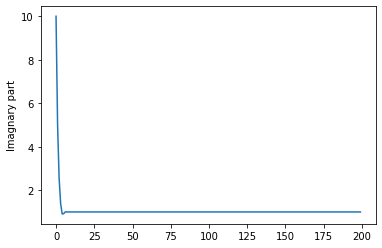

In [113]:
z=10.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d4(z)
  znext = z - function4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= -10.0 + 10.0j$

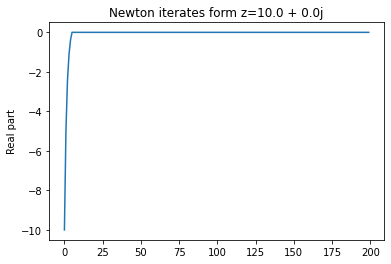

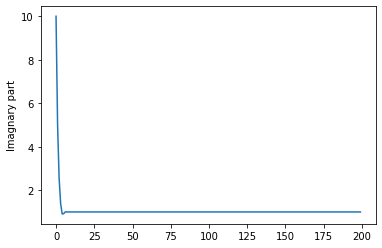

In [114]:
z=-10.0 + 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d4(z)
  znext = z - function4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= -10.0 - 10.0j$

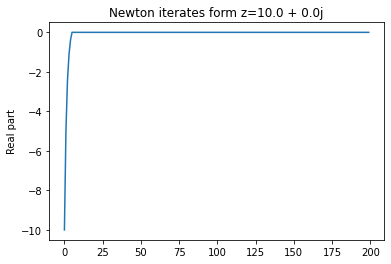

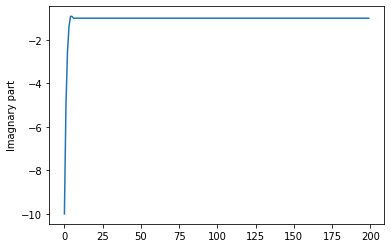

In [115]:
z=-10.0 - 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d4(z)
  znext = z - function4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()

 #### $z= 10.0 - 10.0j$

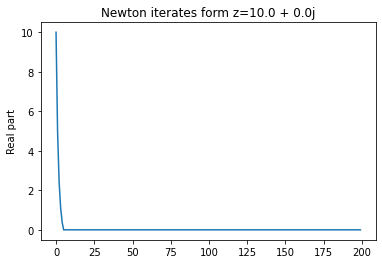

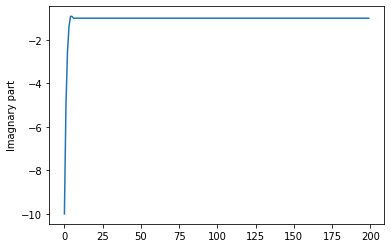

In [116]:
z=10.0 - 10.0j
r=[]
i=[]
eps = 1e-3 # max error allowed
for k in range(200):
  dz = d4(z)
  znext = z - function4(z) / dz # Newton iteration
  r.append(np.real(z))
  i.append(np.imag(z))

  z = znext
  
plt.title('Newton iterates form z=10.0 + 0.0j')
plt.plot(r)
plt.ylabel('Real part')
plt.show()
plt.plot(i)
plt.ylabel('Imagnary part')
plt.show()